This program parses through [officequotes.net](https://www.officequotes.net/) and stores the script in text files corresponding to each episode in The Office.

The extracted scripts are used to plot a "Character Interaction" heat map, calculated by measuring how many times each character has said another character's name in the show. The heat map generated is fairly symmetric, implying that the number of times Character A says Character B's name, is proportional to the number times that Character B says Character A's name. 

This is what is expected should the heat map be truly representative of character interaction.

In [1]:
import requests
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt

import nltk
from wordcloud import WordCloud, STOPWORDS

#plot inline
%matplotlib inline

In [2]:
#dictionary of seasons and corresponding episodes
seas_epi = {1:6, 2:22, 3:23, 4:14, 5:26, 6:24, 7:24, 8:24, 9:23}

#dictionary to all store all characters and their lines for the show
quotes={}

for season in seas_epi.keys():
    for episode in range(1,seas_epi[season]+1):
        
        #define empty string to store script for current episode
        curr_str=''
        
        #open scripts website
        URL = 'https://www.officequotes.net/no{}-{}.php'.format(season,("%02d"%episode))
        r = requests.get(URL)
        
        #Create a BeautifulSoup object
        soup = BeautifulSoup(r.content, 'html5lib')
        
        #look for the bold tag (all speaker names in script are in bold)
        regex = re.compile('<b>')
        
        #get raw html string
        page_content=str(soup).lower()
        
        #split lines by bold tag
        page_content=regex.split(page_content)
        
        #parse through lines
        for lines in page_content:
            if ("</b>" not in lines):
                pass
            
            else:
                idx = lines.find(':')
                if idx != -1:
                    name = lines[:idx]
                    if len(name)>15:
                        pass
                    
                    else:
                        #all quotes end with a <p> tag
                        #i.e the next line starts with a <p> tag
                        quote_ = lines[(idx+1):lines.find('<p>')]
                
                        #remove html tags
                        #remove tabs and new line within the same quote
                        #remove text within []. e.g. [everybody chants "Michael"]
                        quote_=re.sub(r"\t+|  +|\n+|</b>+|<br/>+|</div>+|’+|\[(.*?)\]", "", quote_)
                
                        #get rid of any html tags within the quote that may have slipped
                        quote_ = quote_[:quote_.find('<')]
                
                        #ignore if resulting quote is an empty string
                        #of if name>15 characters (junk text)
                        if len(quote_) == 0 | len(name)>15:
                            pass
                    
                        else:
                            #add to existing name or create new dictionary entry
                            if name in quotes:
                                quotes[name]=quotes[name]+' '+quote_
                            else:
                                quotes[name]=quote_
                
                            #store all lines for current episode
                            curr_str=curr_str+'{}: {}\n'.format(name,quote_)
                    
        #write to text file
        f= open("TheOffice/s{}e{}.txt".format(season,episode),"w+")
        try:
            f.write(curr_str)
        except:
            pass
        

Define list of major characters that we are interested in. Add/delete from list as necessary. All plots referenced to this list.

In [3]:
major_characters = ['Michael','Dwight','Jim','Pam','Andy','Angela','Kevin','Oscar','Darryl','Erin','Phyllis','Stanley','Meredith','Creed','Ryan','Kelly','Toby','Gabe','David','Jan','Holly']

Calculate how many times each major character has said another major character's name and store in a data frame.

Speaker stored in rows, name spoken stored in columns.

In [4]:
df = pd.DataFrame(columns = major_characters, index = major_characters)
for i in major_characters:
    for j in major_characters:
        df.loc[i,j]=(quotes[i.lower()].count(j.lower()))
df=df.astype('float64')

Plot the data frame. It is clear from the plot that majority of screen time is dedicated to Michael, Dwight, Jim and Pam. The heat map is also plotted using a logarithmic color scheme for better visualization. 

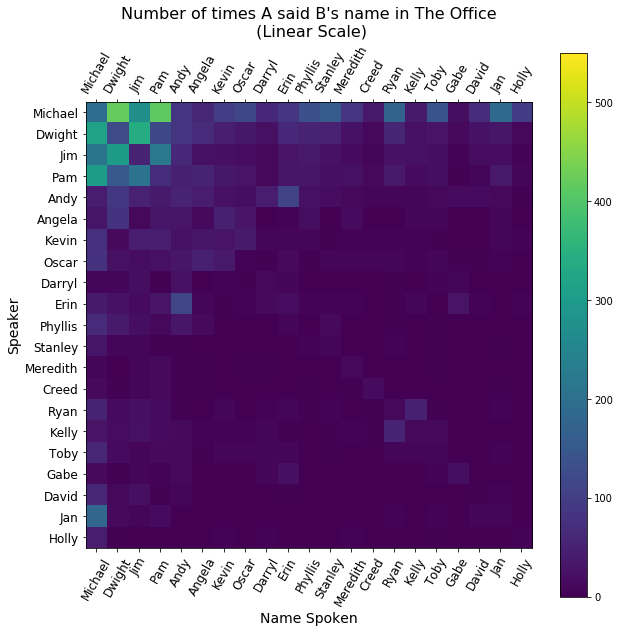

In [53]:
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(df)
plt.colorbar()

imgplot.set_clim(0, 550)

x = np.arange(0,len(major_characters),1)

plt.xticks(x,major_characters,rotation=60,fontsize=12)
plt.yticks(x,major_characters,rotation=0, fontsize=12)

plt.xlabel("Name Spoken", fontsize=14)
plt.ylabel("Speaker", fontsize=14)

plt.title("Number of times A said B's name in The Office\n (Linear Scale)", fontsize=16)

plt.show()

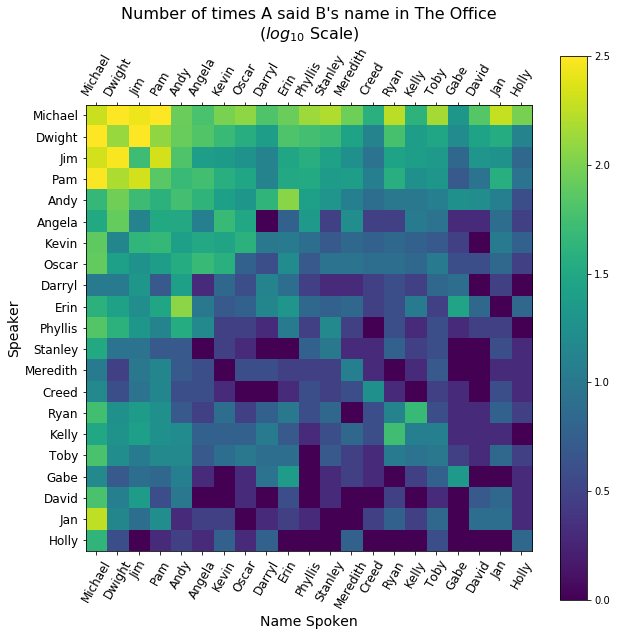

In [52]:
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(np.log10(1+df))
plt.colorbar()

imgplot.set_clim(0, 2.5)

x = np.arange(0,len(major_characters),1)

plt.xticks(x,major_characters,rotation=60,fontsize=12)
plt.yticks(x,major_characters,rotation=0, fontsize=12)

plt.xlabel("Name Spoken", fontsize=14)
plt.ylabel("Speaker", fontsize=14)

plt.title("Number of times A said B's name in The Office\n"+ r'$(log_{10}$' + ' Scale)', fontsize=16)

plt.show()

Michael


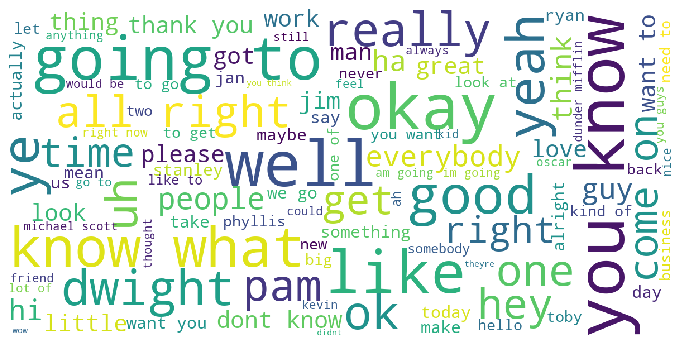

Dwight


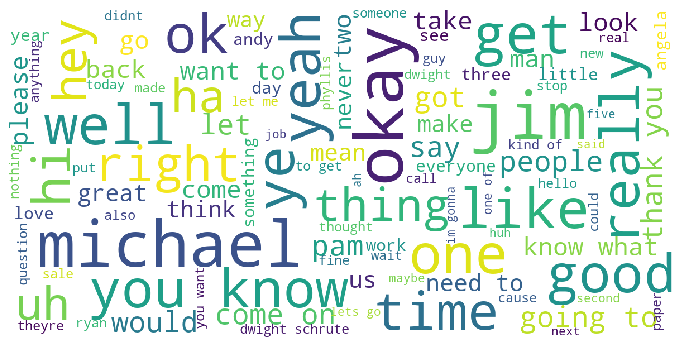

Jim


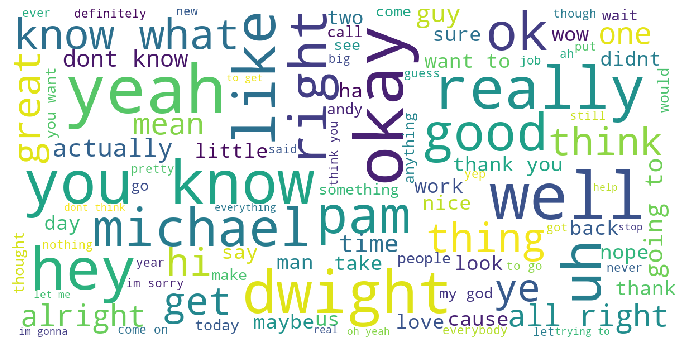

Pam


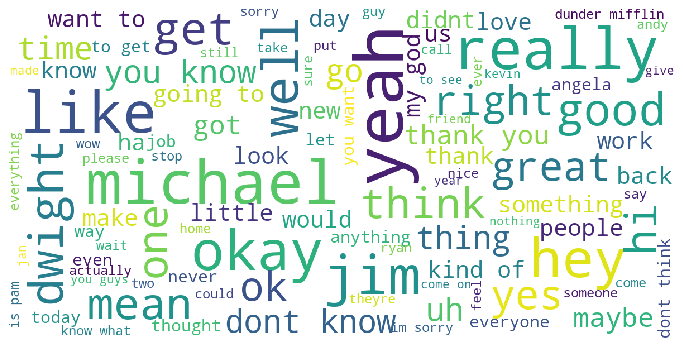

Andy


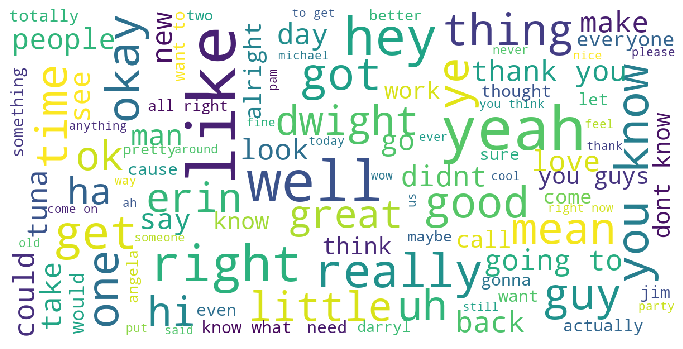

Angela


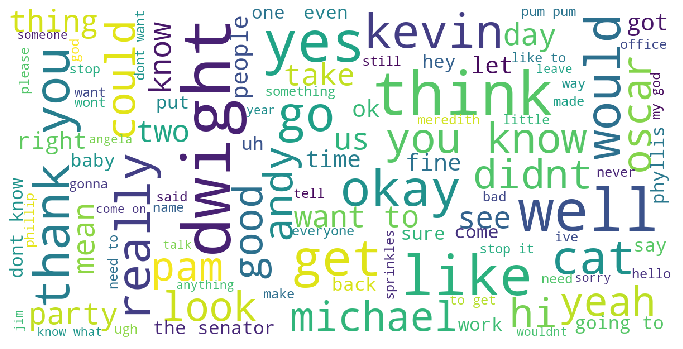

Kevin


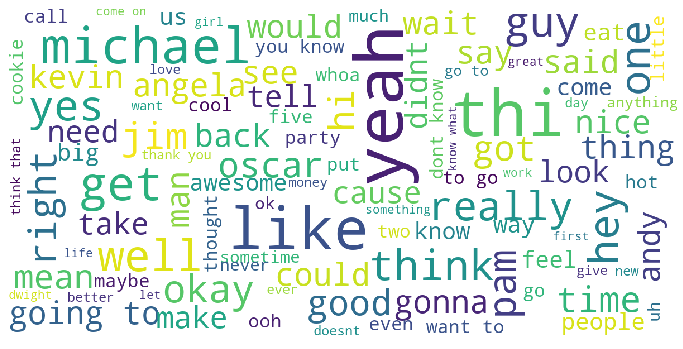

Oscar


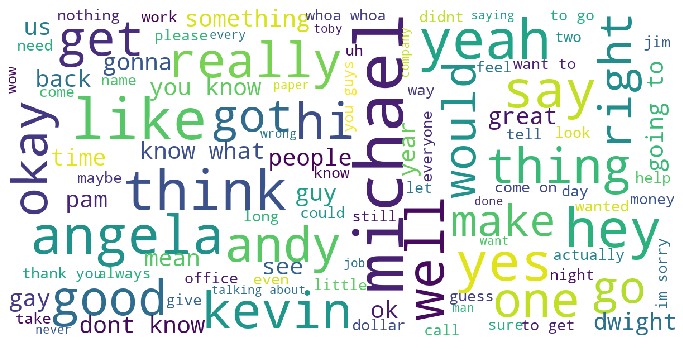

Darryl


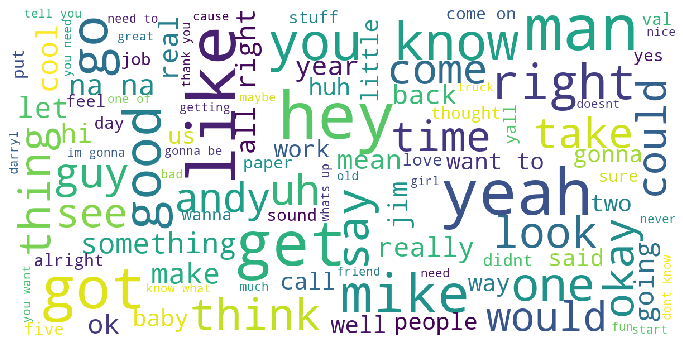

Erin


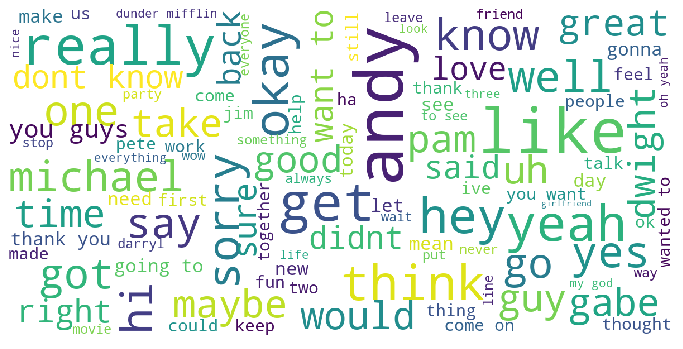

Phyllis


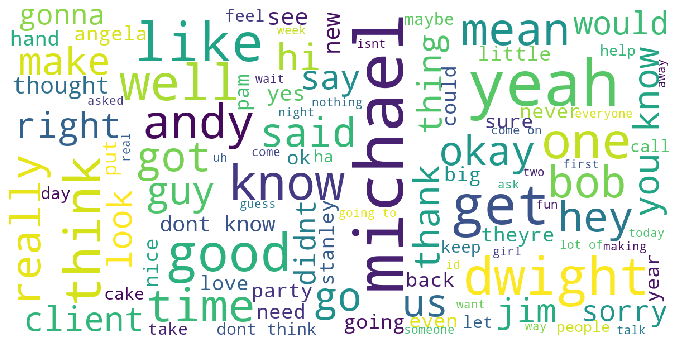

Stanley


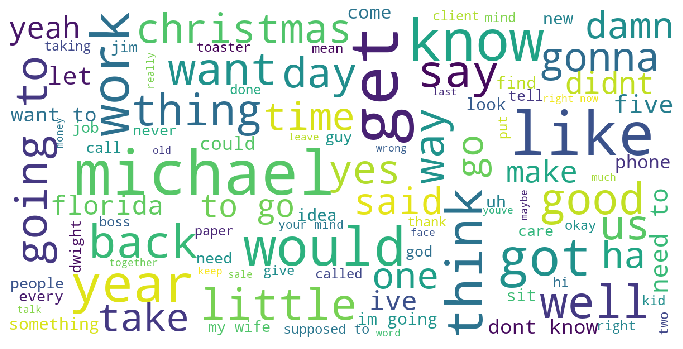

Meredith


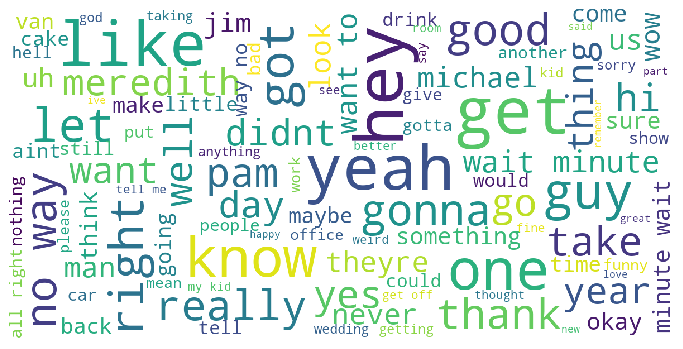

Creed


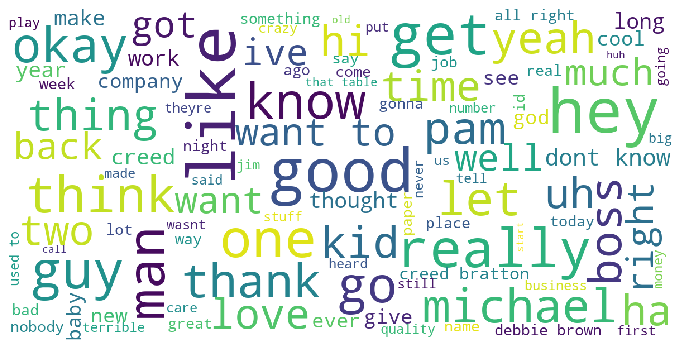

Ryan


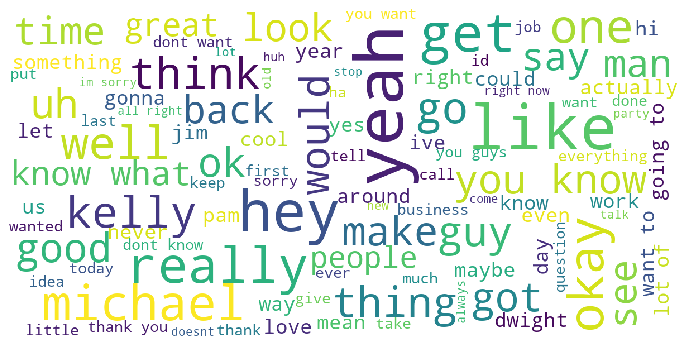

Kelly


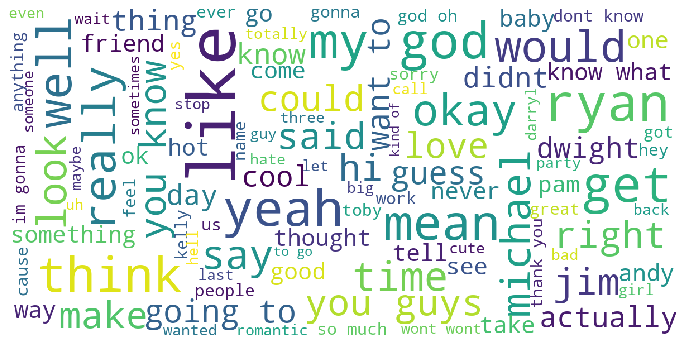

Toby


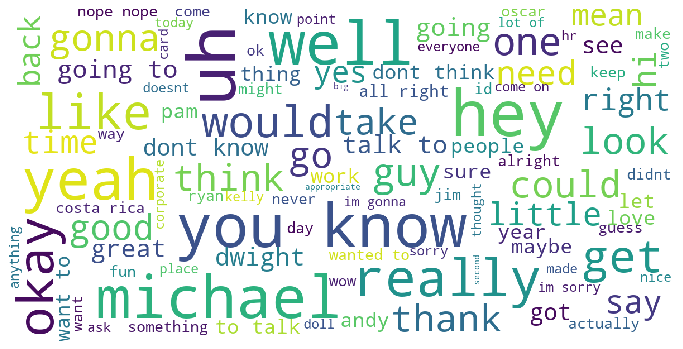

Gabe


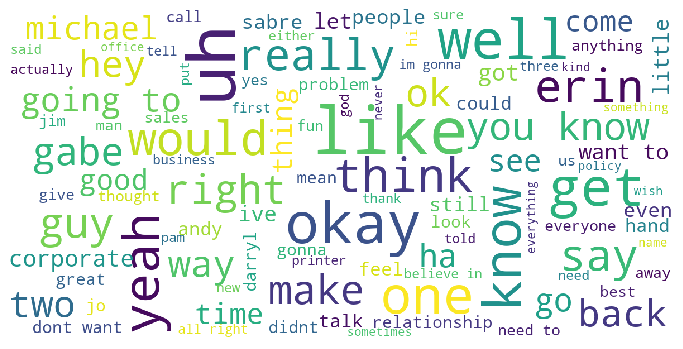

David


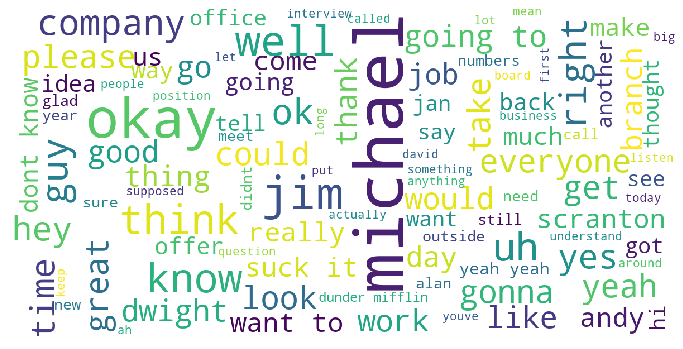

Jan


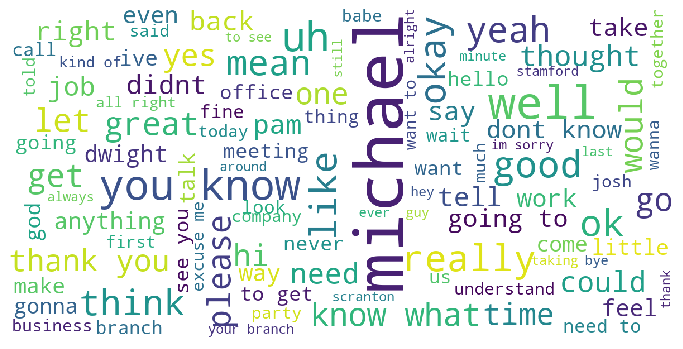

Holly


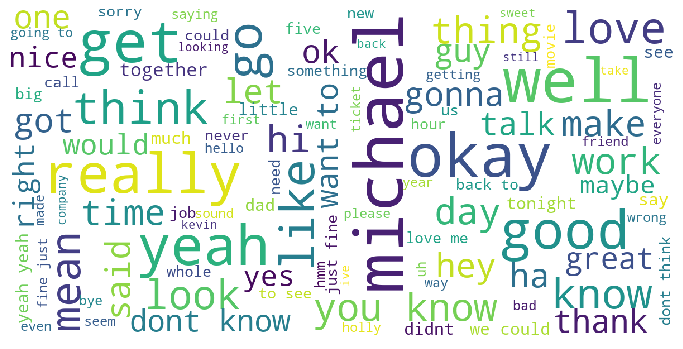

In [54]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['dont','ill','wa','you','im','not','is','youre','cant','oh','um','to']
stopwords.extend(newStopWords)
stopwords = set(stopwords)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=40)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

for chars in major_characters:
    print(chars)
    show_wordcloud(quotes[chars.lower()])